In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [40]:
# Setting an appealing theme
sns.set_style("white")  # Other options: "dark", "white", "ticks"
sns.set_context("poster")  # Other options: "paper", "notebook", "talk", "poster"
sns.set_palette("muted")  # Other options: "deep", "muted", "bright", "dark", "colorblind"
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

In [72]:
df = pd.read_csv(f'../data/train.csv')
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


### Clean Dataset with no null values

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

## Domain knowledge

**Eye Sight**
1. Don't know what measurements mean

**Hearing**
1. Dont know what measurements mean

**Blood Pressure**
1. Systolic: Pressure in artieries when heart beats
2. Diastolic (relaxation): Pressure in arteries when heart rests between beats

1. Systolic BP < 120 mmHg or Diastolic BP < 80 mmHg - normal
2. Systolic BP between 120 mmHg- 129 mmHg or Diastolic BP between 80-89 mmHg- elevated
3. Systolic BP between 130 mmHg - 139 mmHg or Diastolic BP between 90-99 mmHg- stage 1 high BP
4. Systolic BP between 140 mmHg - 179 mmHg or Diastolic BP between 100-119 mmHg- stage 2 high BP
5. Systolic BP >= 180 mmHg or Diastolic BP >= 120 mmHg- stage 3 high BP (emergency)

**fasting blood sugar**
1. 99 mg/dL or lower is normal
2. 100 to 125 mg/dL indicates you have prediabetes
3. 126 mg/dL or higher indicates you have diabetes

**Cholesterol**
1. Sum of HDL + LDL + triglycerids/0.2
2. Less than 200mg/dL Desirable
3. 200-239 mg/dL Borderline high
4. 240mg/dL and above High


**HDL**
1. Less then 40- High risk
2. Between 40-60 - Normal
3. Greater of equals 60- Low risk

**LDL**
1. Less than 100mg/dL- Optimal (best for your health)
2. 100-129mg/dL- Near optimal
3. 130-159 mg/dL- Borderline high
4. 160-189 mg/dL- High
5. 190 mg/dL and above- Very High

**triglyceride**
1. Less than 150 - normal
2. 150- 199- moderate risk
3. 200-499- high risk
4. 500+ - very high risk

**hemoglobin**
1. The normal Hb level for males is 14 to 18 g/dl; that for females is 12 to 16 g/dl.

**Urine Protein**
1. Measures the amount of protein in urine
2. Not much information based on the values in the dataframe

**serum creatinine**
1. A creatinine test is a measure of how well your kidneys are performing their job of filtering waste from your blood.
2. For adult men - 0.74 to 1.35 mg/dL (65.4 to 119.3 micromoles/L)
3. For adult women - 0.59 to 1.04 mg/dL (52.2 to 91.9 micromoles/L)

**AST / ALT**
1. The normal range of an SGOT test is generally between 8 and 45 units per liter of serum
2. Higher results indicate risk for liver disease

**GTP**
1. normal range for adults is 5 to 40 U/L
2. values above 40 are considered risky for liver disease

**Dental Carries**
1. Dental caries is a common chronic infectious resulting from tooth-adherent cariogenic bacteria, primarily Streptococcus Mutans, which metabolize sugars to produce acid, demineralizing the tooth structure over time.


In [74]:
df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [75]:
df.corr()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,1.000000,-0.003724,0.000710,-0.001656,-0.003491,0.002325,0.001222,-0.003876,-0.003448,0.000107,...,0.003049,-0.003059,0.000834,-0.000900,-0.001278,0.000685,-0.000270,0.006935,-0.001382,-0.000632
age,-0.003724,1.000000,-0.489608,-0.336859,-0.045369,-0.269495,-0.277638,0.212889,0.212972,0.160437,...,0.041411,0.103529,-0.280851,-0.004526,-0.143808,0.036595,-0.131419,-0.046879,-0.120556,-0.206033
height(cm),0.000710,-0.489608,1.000000,0.686645,0.409500,0.209997,0.216729,-0.090110,-0.091760,0.062297,...,-0.303450,-0.080001,0.568739,-0.015097,0.459654,0.059126,0.222305,0.218809,0.100585,0.447111
weight(kg),-0.001656,-0.336859,0.686645,1.000000,0.830208,0.151794,0.161344,-0.069761,-0.070679,0.241495,...,-0.438224,0.059438,0.527259,-0.028537,0.391769,0.160221,0.376899,0.290996,0.091375,0.351748
waist(cm),-0.003491,-0.045369,0.409500,0.830208,1.000000,0.046964,0.055094,0.004759,0.006637,0.306150,...,-0.449219,0.114552,0.418245,-0.029491,0.294176,0.185690,0.359736,0.294166,0.053575,0.262715
eyesight(left),0.002325,-0.269495,0.209997,0.151794,0.046964,1.000000,0.448945,-0.067788,-0.070379,-0.030718,...,-0.043069,-0.018312,0.134314,-0.011633,0.089165,-0.000032,0.063819,0.041759,0.020019,0.100420
eyesight(right),0.001222,-0.277638,0.216729,0.161344,0.055094,0.448945,1.000000,-0.072888,-0.078285,-0.026931,...,-0.047384,-0.016913,0.140602,-0.011213,0.087232,0.007967,0.073843,0.052901,0.024314,0.109781
hearing(left),-0.003876,0.212889,-0.090110,-0.069761,0.004759,-0.067788,-0.072888,1.000000,0.553312,0.041887,...,-0.004135,-0.011467,-0.051724,-0.007248,-0.009447,-0.003497,-0.036896,-0.021820,-0.019155,-0.038219
hearing(right),-0.003448,0.212972,-0.091760,-0.070679,0.006637,-0.070379,-0.078285,0.553312,1.000000,0.041790,...,-0.003311,-0.012463,-0.049649,-0.004164,-0.009263,-0.001232,-0.036679,-0.017286,-0.016100,-0.036858
systolic,0.000107,0.160437,0.062297,0.241495,0.306150,-0.030718,-0.026931,0.041887,0.041790,1.000000,...,-0.116457,0.052032,0.174904,-0.029040,0.066902,0.092272,0.109954,0.159811,0.018136,0.058642


# Checking for imbalance


In [11]:
df['smoking'].value_counts()

0    89603
1    69653
Name: smoking, dtype: int64

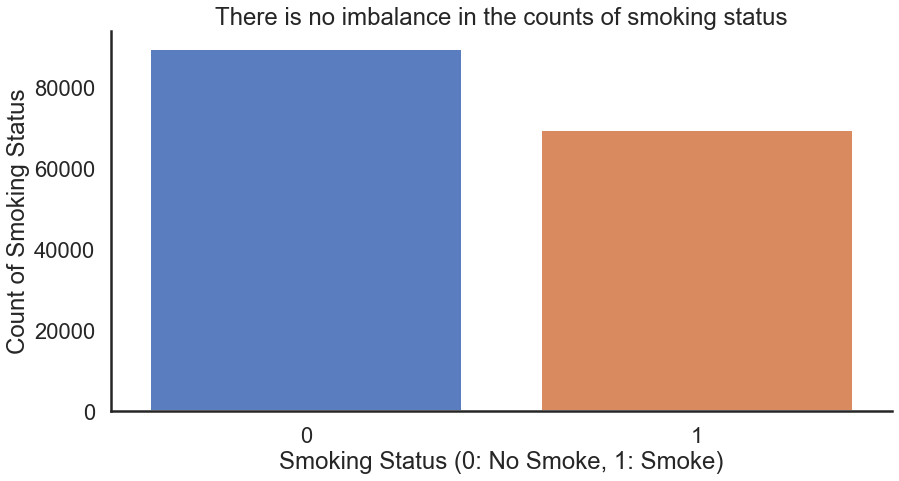

In [41]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['smoking'])
plt.title('There is no imbalance in the counts of smoking status')
plt.ylabel('Count of Smoking Status')
plt.xlabel('Smoking Status (0: No Smoke, 1: Smoke)')
plt.show()

# EDA on Body Mass Index

### Caluclating BMI and checking corelation with smoking status
#### (Easier to work with than height and weight seperately)
#### Height and Weight have high correlation


In [77]:
df['bmi'] = (df['weight(kg)']/(df['height(cm)'])**2)*10000
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,bmi
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,75,16.5,1,1.0,22,25,27,0,1,22.038567
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,126,16.2,1,1.1,27,23,37,1,0,23.875115
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,93,17.4,1,0.8,27,31,53,0,1,25.951557
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,102,15.9,1,1.0,20,27,30,1,0,29.320988
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,93,15.4,1,0.8,19,13,17,0,1,22.038567


#### BMI not heavily correlated with smoking when height and weight are??

In [78]:
df[['bmi','smoking']].corr()

,bmi,smoking
bmi,1.000000,0.141723
smoking,0.141723,1.000000


### Distribution of BMI

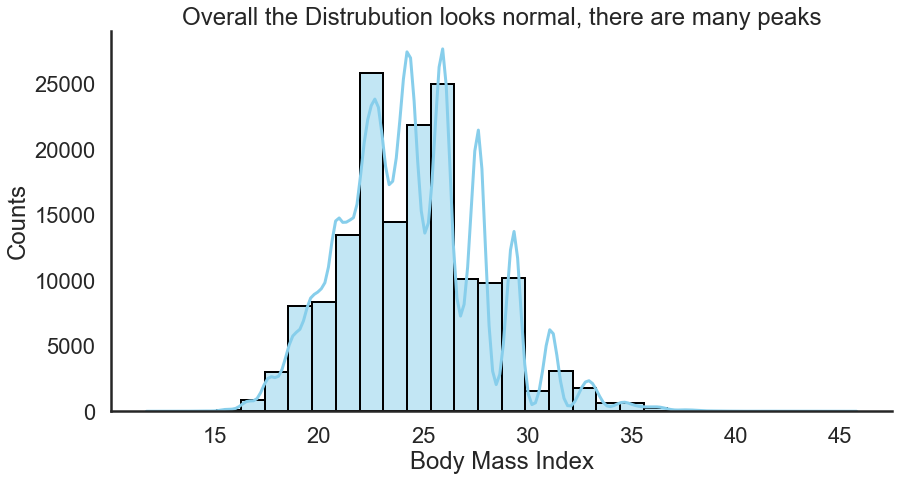

In [61]:
plt.figure(figsize=(14,7))
sns.histplot(df['bmi'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Overall the Distrubution looks normal, there are many peaks')
plt.xlabel('Body Mass Index')
plt.ylabel('Counts')
plt.show()

### Distribution of BMI based on Smoking status

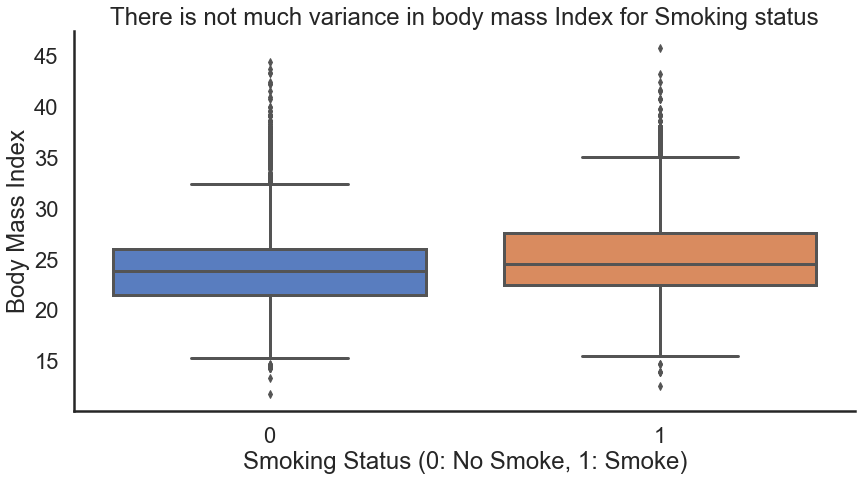

In [62]:
plt.figure(figsize=(14,7))
sns.boxplot(x='smoking', y = 'bmi', data = df)
plt.title('There is not much variance in body mass Index for Smoking status')
plt.ylabel('Body Mass Index')
plt.xlabel('Smoking Status (0: No Smoke, 1: Smoke)')
plt.show()

# EDA on Height and Weight and waist

In [92]:
df[['height(cm)','weight(kg)','smoking','waist(cm)']].corr()

,height(cm),weight(kg),smoking,waist(cm)
height(cm),1.000000,0.686645,0.447111,0.409500
weight(kg),0.686645,1.000000,0.351748,0.830208
smoking,0.447111,0.351748,1.000000,0.262715
waist(cm),0.409500,0.830208,0.262715,1.000000


### Distribution of height and weight

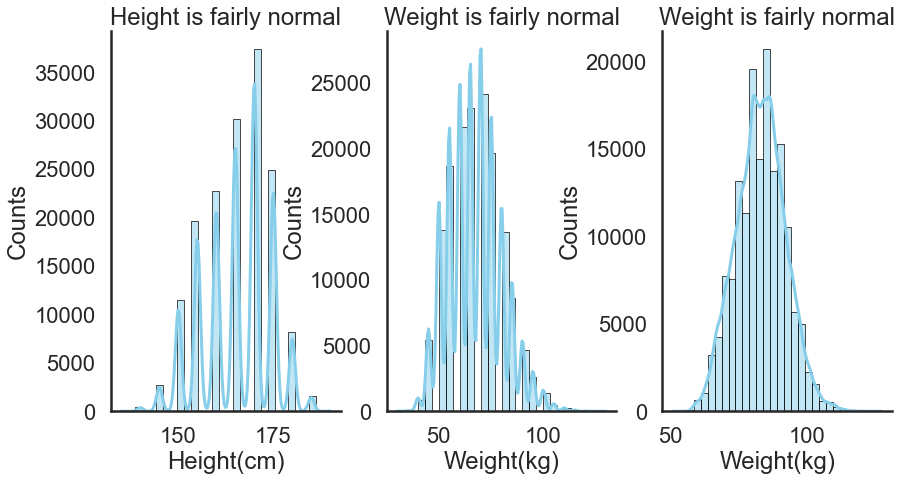

In [101]:
plt.figure(figsize=(14,7))
plt.subplot(1,3,1)
sns.histplot(df['height(cm)'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Height is fairly normal')
plt.xlabel('Height(cm)')
plt.ylabel('Counts')


plt.subplot(1,3,2)
sns.histplot(df['weight(kg)'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Weight is fairly normal')
plt.xlabel('Weight(kg)')
plt.ylabel('Counts')

plt.subplot(1,3,3)
sns.histplot(df['waist(cm)'], kde=True, bins=30, color='skyblue', edgecolor='black')
plt.title('Waist is fairly normal')
plt.xlabel('Waist(cm)')
plt.ylabel('Counts')
plt.show()

### Distribution of height and weight based on smoking status

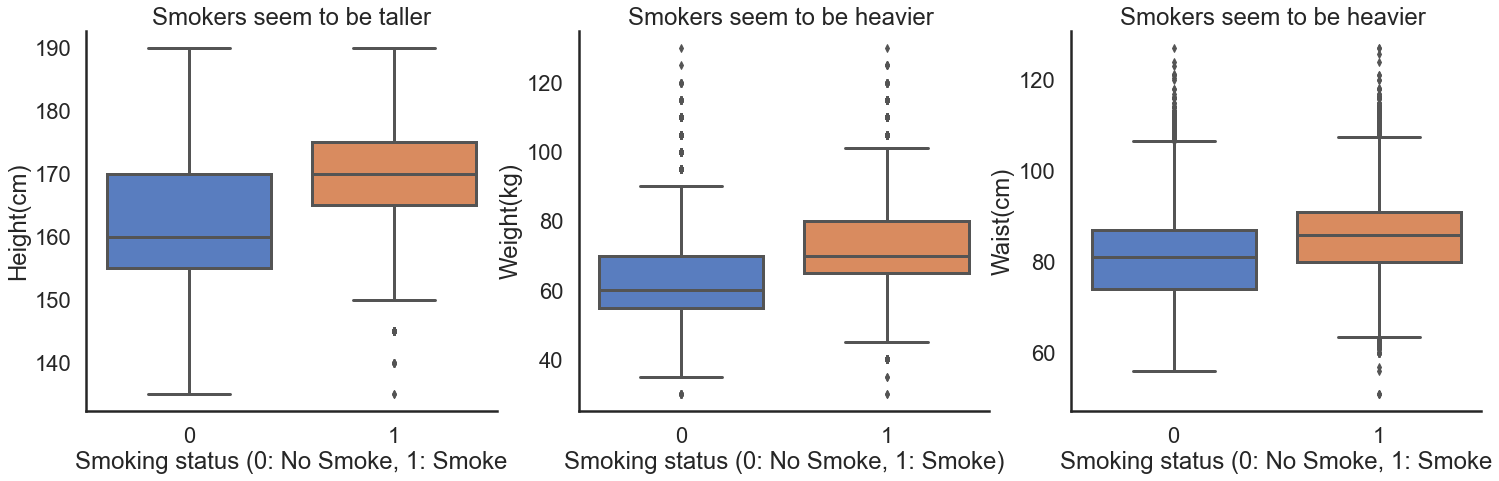

In [110]:
plt.figure(figsize=(25,7))
plt.subplot(1,3,1)
sns.boxplot(x='smoking', y = 'height(cm)', data = df)
plt.title('Smokers seem to be taller')
plt.xlabel('Smoking status (0: No Smoke, 1: Smoke')
plt.ylabel('Height(cm)')



plt.subplot(1,3,2)
sns.boxplot(x='smoking', y = 'weight(kg)', data = df)
plt.title('Smokers seem to be heavier ')
plt.ylabel('Weight(kg)')
plt.xlabel('Smoking status (0: No Smoke, 1: Smoke)')


plt.subplot(1,3,3)
sns.boxplot(x='smoking', y = 'waist(cm)', data = df)
plt.title('Smokers seem to be heavier ')
plt.ylabel('Waist(cm)')
plt.xlabel('Smoking status (0: No Smoke, 1: Smoke')
plt.show()

# EDA on AGE

### Distribution of Age

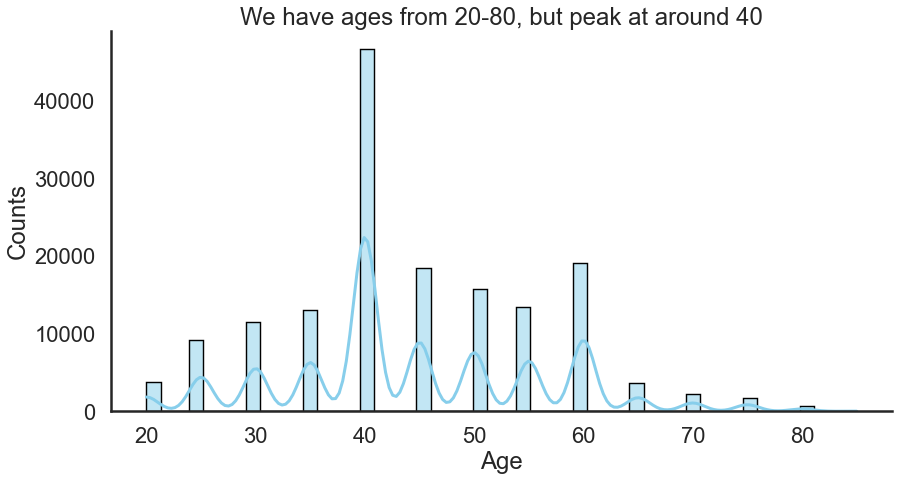

In [67]:
plt.figure(figsize=(14,7))
sns.histplot(df['age'], kde=True, bins=50, color='skyblue', edgecolor='black')
plt.title('We have ages from 20-80, but peak at around 40')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

### Distribution of Age based on smoking status

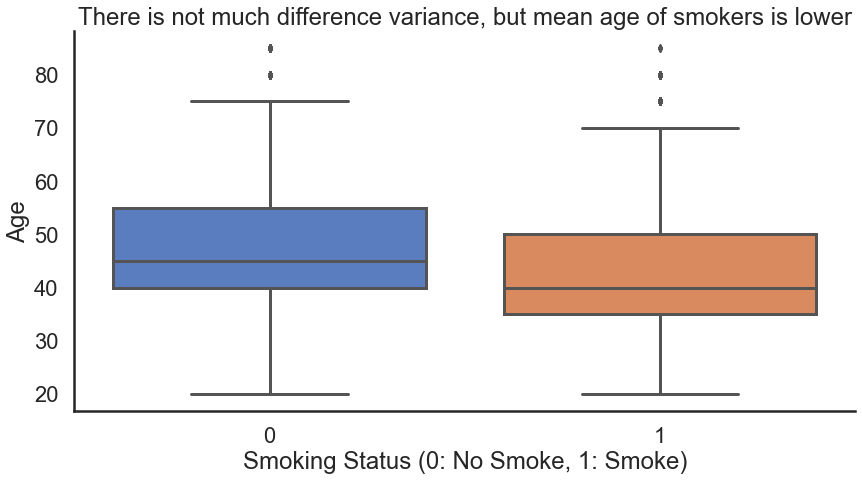

In [69]:
plt.figure(figsize=(14,7))
sns.boxplot(x='smoking', y = 'age', data = df)
plt.title('There is not much difference variance, but mean age of smokers is lower')
plt.ylabel('Age')
plt.xlabel('Smoking Status (0: No Smoke, 1: Smoke)')
plt.show()